### imputeTS: [Time Series Missing Value Imputation in R](https://cran.r-project.org/web/packages/imputeTS/vignettes/imputeTS-Time-Series-Missing-Value-Imputation-in-R.pdf)

In [54]:
library(ggplot2)
library(dplyr)
library(imputeTS)
library(data.table)
library(forecast)

In [55]:
df_us = read.csv(file="hts_us_ind.csv", header=TRUE, sep=",")

In [56]:
df_us = as.data.table(df_us)

In [57]:
rownames(df_us) = as.Date(df_us$date)
#rownames(data)
df_us$date <- NULL
#colnames(data)

In [58]:
dim(df_us)

[1]   54 1050

In [70]:
df_us %>% 
  select_if(function(x) any(is.na(x))) 

<0 x 0 matrix>

In [60]:
df_us$MEAGR  <- na.ma(df_us$MEAGR, weighting = "exponential", k = 4)
df_us$MEMIN  <- na.ma(df_us$MEMIN, weighting = "exponential", k = 4)

In [61]:
df_us$DECON  <- na.ma(df_us$DECON, weighting = "exponential", k = 4) 

In [62]:
df_us$DEMIN[13:54]  <- rep(0,length(df_us$DEMIN[13:54]))
df_us$DEMIN  <- na.ma(df_us$DEMIN, weighting = "exponential", k = 8)

In [63]:
df_us$DEAGR[13:54]  <- rep(0,length(df_us$DEAGR[13:54]))
# df_us$DEAGR  <- na.kalman(df_us$DEAGR, model =  "StructTS", nit = -1)

In [64]:
df_us$RIMIN[33:54]  <- rep(0,length(df_us$RIMIN[33:54]))
df_us$RIAGR[33:54]  <- rep(0,length(df_us$RIMIN[33:54]))
df_us$RIMIN  <- na.ma(df_us$RIMIN, weighting = "exponential", k = 8)
df_us$RIAGR  <- na.ma(df_us$RIAGR, weighting = "exponential", k = 8)

In [66]:
df_us$RICON  <- na.ma(df_us$RICON, weighting = "exponential", k = 4)
df_us$WYAGR  <- na.ma(df_us$WYAGR, weighting = "exponential", k = 4)
df_us$WYNDU  <- na.ma(df_us$WYNDU, weighting = "exponential", k = 4)
df_us$WYDUR  <- na.ma(df_us$WYDUR, weighting = "exponential", k = 4)

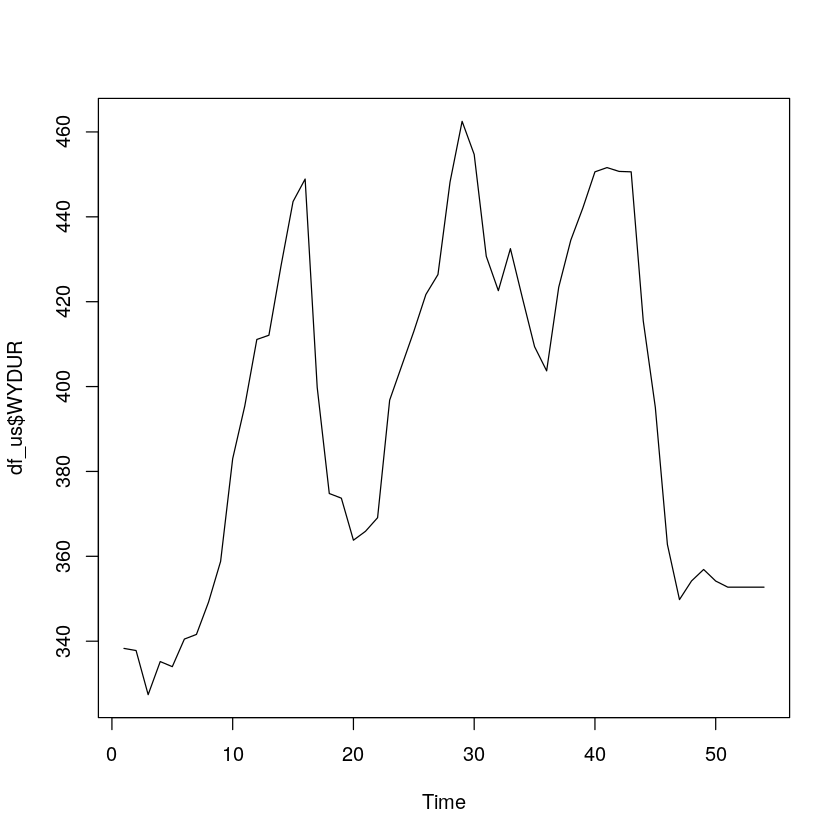

In [69]:
ts.plot(df_us$WYDUR)

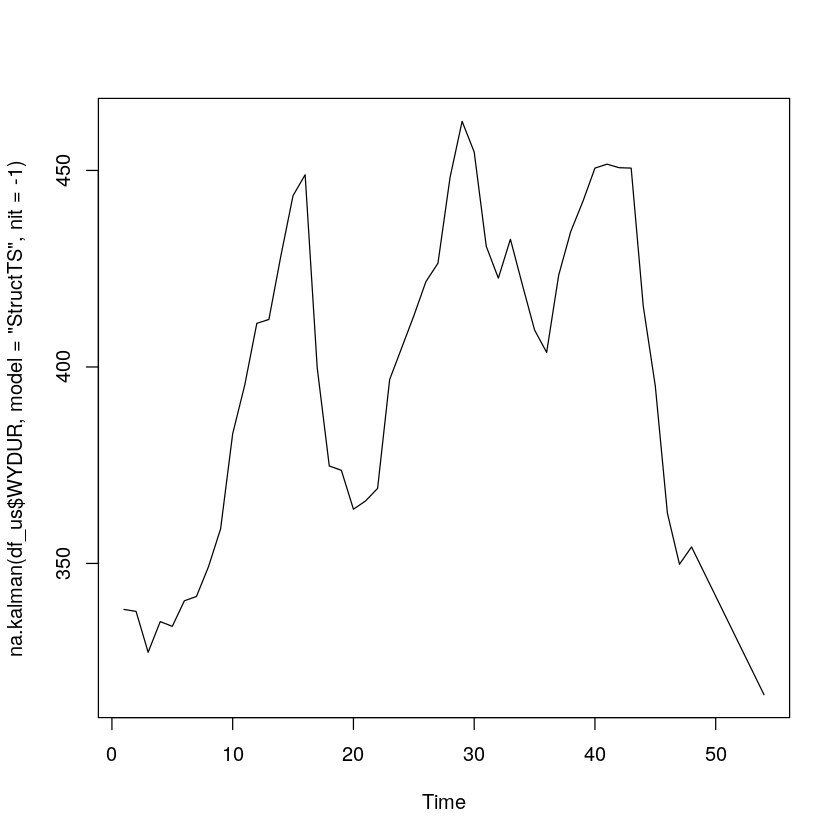

In [145]:
ts.plot(na.kalman(df_us$WYDUR, model =  "StructTS", nit = -1))

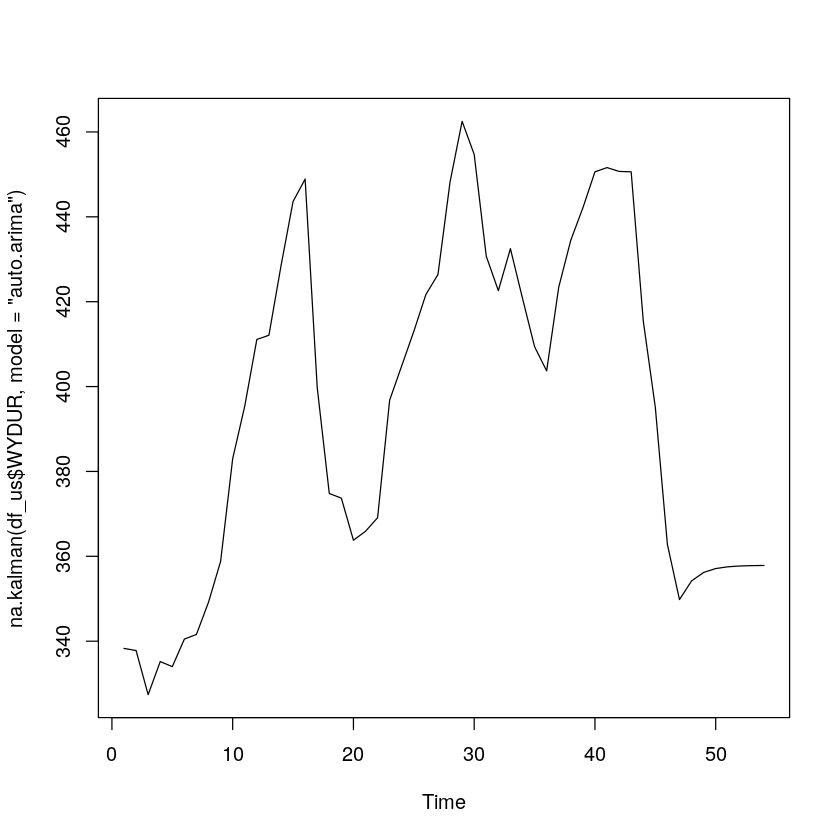

In [146]:
ts.plot(na.kalman(df_us$WYDUR, model =  "auto.arima"))

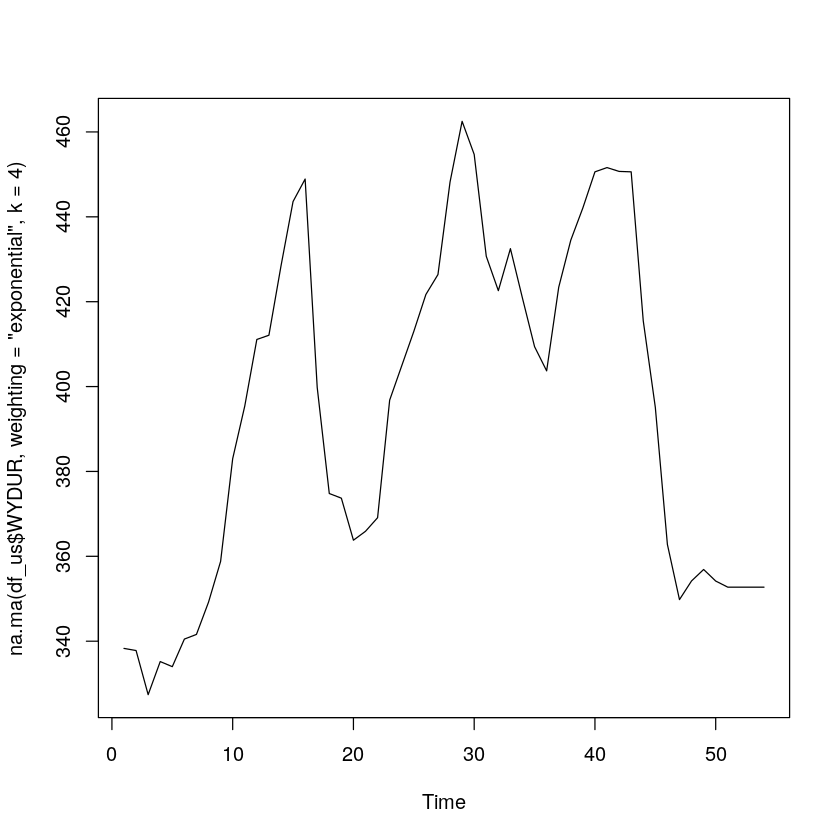

In [149]:
ts.plot(na.ma(df_us$WYDUR, weighting = "exponential", k = 4)) 

In [71]:
write.csv(df_us, file="hts_us_ind_filled.csv")